In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('ggplot')


import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.2f}'.format

# 데이터 정제
1. 데이터 불러오기 & 정제<br>


2. 데이터 시각화 작업
    - 행정동별 시각화
    - 연령별 시각화

### 1. 데이터 불러오기 & 정제

In [2]:
Data_Age = pd.read_csv('Input/Flow_SK/Four_Region_FLOW_AGE.csv',index_col = [0])

In [310]:
Data_Age['Year'] = Data_Age.STD_YMD.apply(lambda x : str(x)[:4])
Data_Age['Month'] = Data_Age.STD_YMD.apply(lambda x : str(x)[4:6])
Data_Age['Day'] = Data_Age.STD_YMD.apply(lambda x : str(x)[6:])

In [312]:
Data_Age= Data_Age.drop(['STD_YM',"STD_YMD"],axis = 1)
Data_Age = Data_Age.reindex(columns= ['Year', 'Month','Day','HDONG_CD', 'HDONG_NM', 'MAN_FLOW_POP_CNT_0004',
       'MAN_FLOW_POP_CNT_0509', 'MAN_FLOW_POP_CNT_1014',
       'MAN_FLOW_POP_CNT_1519', 'MAN_FLOW_POP_CNT_2024',
       'MAN_FLOW_POP_CNT_2529', 'MAN_FLOW_POP_CNT_3034',
       'MAN_FLOW_POP_CNT_3539', 'MAN_FLOW_POP_CNT_4044',
       'MAN_FLOW_POP_CNT_4549', 'MAN_FLOW_POP_CNT_5054',
       'MAN_FLOW_POP_CNT_5559', 'MAN_FLOW_POP_CNT_6064',
       'MAN_FLOW_POP_CNT_6569', 'MAN_FLOW_POP_CNT_70U',
       'WMAN_FLOW_POP_CNT_0004', 'WMAN_FLOW_POP_CNT_0509',
       'WMAN_FLOW_POP_CNT_1014', 'WMAN_FLOW_POP_CNT_1519',
       'WMAN_FLOW_POP_CNT_2024', 'WMAN_FLOW_POP_CNT_2529',
       'WMAN_FLOW_POP_CNT_3034', 'WMAN_FLOW_POP_CNT_3539',
       'WMAN_FLOW_POP_CNT_4044', 'WMAN_FLOW_POP_CNT_4549',
       'WMAN_FLOW_POP_CNT_5054', 'WMAN_FLOW_POP_CNT_5559',
       'WMAN_FLOW_POP_CNT_6064', 'WMAN_FLOW_POP_CNT_6569',
       'WMAN_FLOW_POP_CNT_70U'])

In [783]:
Data_Age.head()

,Year,Month,Day,HDONG_name,HDONG_region,HDONG_CD,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,2019,02,01,소공동,동,1114052000,16.64,116.18,419.70,1553.57,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,2019,02,02,소공동,동,1114052000,3.14,141.07,763.30,1405.29,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,2019,02,03,소공동,동,1114052000,1.38,120.39,698.23,1117.17,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,2019,02,04,소공동,동,1114052000,0.08,141.61,772.41,1248.85,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,2019,02,05,소공동,동,1114052000,0.00,254.70,1394.92,2190.69,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09


## 2. 데이터 시각화 작업

<h3> 행정동별 시각화 작업 ("월"을 기준으로 데이터 분석)</h3>

- 행정동을 세분화 작업 후 진행 
- 세분화 작업 추가설명 : 1,2,3동처럼 "동"이 나누어 지면 1,2,3처럼 숫자로 표현됨. <br>
그러나 동이 나누어지지 않으면 그냥 "동"으로 표현됨.

<br>
EX) 소공동 : 소공동 + 동     /         고산3동 : 고산 + 3동 <br>
위처럼 데이터를 세분화 작업

In [315]:
Data_Age['HDONG_name'] = Data_Age.HDONG_NM.apply(lambda x : re.compile('[가-힣]+').findall(x)[0])
Data_Age['HDONG_region'] = Data_Age.HDONG_NM.apply(lambda x : re.compile('[0-9동]+').findall(x))
Data_Age = Data_Age.reindex(columns= ['Year', 'Month','Day','HDONG_name', 'HDONG_region', 'HDONG_CD', 'HDONG_NM', 'MAN_FLOW_POP_CNT_0004',
       'MAN_FLOW_POP_CNT_0509', 'MAN_FLOW_POP_CNT_1014',
       'MAN_FLOW_POP_CNT_1519', 'MAN_FLOW_POP_CNT_2024',
       'MAN_FLOW_POP_CNT_2529', 'MAN_FLOW_POP_CNT_3034',
       'MAN_FLOW_POP_CNT_3539', 'MAN_FLOW_POP_CNT_4044',
       'MAN_FLOW_POP_CNT_4549', 'MAN_FLOW_POP_CNT_5054',
       'MAN_FLOW_POP_CNT_5559', 'MAN_FLOW_POP_CNT_6064',
       'MAN_FLOW_POP_CNT_6569', 'MAN_FLOW_POP_CNT_70U',
       'WMAN_FLOW_POP_CNT_0004', 'WMAN_FLOW_POP_CNT_0509',
       'WMAN_FLOW_POP_CNT_1014', 'WMAN_FLOW_POP_CNT_1519',
       'WMAN_FLOW_POP_CNT_2024', 'WMAN_FLOW_POP_CNT_2529',
       'WMAN_FLOW_POP_CNT_3034', 'WMAN_FLOW_POP_CNT_3539',
       'WMAN_FLOW_POP_CNT_4044', 'WMAN_FLOW_POP_CNT_4549',
       'WMAN_FLOW_POP_CNT_5054', 'WMAN_FLOW_POP_CNT_5559',
       'WMAN_FLOW_POP_CNT_6064', 'WMAN_FLOW_POP_CNT_6569',
       'WMAN_FLOW_POP_CNT_70U'])
Data_Age = Data_Age.drop('HDONG_NM',axis = 1)
Data_Age.HDONG_region = Data_Age.HDONG_region.str[0]

In [782]:
# 정제후 데이터 따로 저장
Data_Age.to_csv('Input/Flow_SK/4개지역_연령별_유동인구(정제후).csv')

In [784]:
Data_Age.head()

,Year,Month,Day,HDONG_name,HDONG_region,HDONG_CD,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
0,2019,02,01,소공동,동,1114052000,16.64,116.18,419.70,1553.57,...,13323.19,12741.15,11628.80,10006.80,9807.06,8099.38,7260.17,5757.53,3359.85,4431.71
1,2019,02,02,소공동,동,1114052000,3.14,141.07,763.30,1405.29,...,7898.27,6580.27,5714.75,4946.22,5055.32,4560.27,4364.57,3838.77,2453.97,3207.26
2,2019,02,03,소공동,동,1114052000,1.38,120.39,698.23,1117.17,...,5079.63,4454.43,3905.32,3484.47,3703.24,3270.26,2984.05,2484.98,1511.67,1954.98
3,2019,02,04,소공동,동,1114052000,0.08,141.61,772.41,1248.85,...,4317.63,3676.47,3506.37,3108.99,3324.07,2841.35,2644.42,2164.35,1230.21,1520.35
4,2019,02,05,소공동,동,1114052000,0.00,254.70,1394.92,2190.69,...,4813.86,4967.92,5161.96,4856.63,5212.69,4462.94,4183.38,3265.62,1692.74,2147.09


In [320]:
# 데이터 분할
Age_sep = dict(list(Data_Age.groupby(['HDONG_name'])))

In [421]:
location_list = list(Age_sep.keys())

##### 1) 연도별 비교

In [758]:
def Check_year(data,location,number=0):
    # 필요 데이터 정리
    age_dict = {'0004' : "0 ~ 4세",'0509' : "5 ~ 9세",'1014':"10 ~ 14세",'1519': "15 ~ 19세",'2024':"20 ~ 24세",'2529' : "25 ~ 29세",'3034' : "30 ~ 34세",'3539':"35 ~ 39세",'4044': "40 ~ 44세",'4549' : "45 ~ 49세",'5054' : "50 ~ 54세",'5559' : "55 ~ 59세",'6064' : "60 ~ 64세",'6569' : "65 ~ 69세",'70U' : "70세 이상"}
    list_age = ['0004','0509','1014','1519','2024','2529','3034','3539','4044','4549','5054','5559','6064','6569','70U']
    #sex_dict = {'MAN' : '남자', 'WMAN' : '여자'}
    number_list = np.arange(0,120,4)    
    Te = pd.DataFrame(number_list,columns = ['number'])
    Te['age']= list_age2
    A = list(np.repeat('남자',15))
    B = list(np.repeat('여자',15))
    sex = A+B
    Te['sex'] = sex
    Te = Te.reset_index()
    
    
    # 데이터 정제
    Test_1 = data[location].groupby(['Year','Month']).sum() 
    Test_1 = Test_1.unstack(level = 1)
    Test_1 = Test_1.drop(['HDONG_CD'],axis = 1)
    
    # 그래프 그리기
    for x in range(Te.shape[0]):
        if x <= 14:
            Test_1.iloc[:,Te.iloc[x,1]:Te.iloc[x,1]+4].plot(kind = 'bar',figsize = (7,7))
            print(Test_1.iloc[:,Te.iloc[x,1]:Te.iloc[x,1]+4])
            plt.title("{} {} 연도별 비교".format(Te.iloc[x,3],age_dict[Te.iloc[x,2]]))
            plt.xticks(fontsize = 20,rotation = 0)
            plt.legend(loc = 'best')
            plt.show()
            print("--------------------------------------------------------------------------------------------")
        else:
            Test_1.iloc[:,Te.iloc[x,1]:Te.iloc[x,1]+4].plot(kind = 'bar',figsize = (7,7))
            print(Test_1.iloc[:,Te.iloc[x,1]:Te.iloc[x,1]+4])
            plt.title("{} {} 연도별 비교".format(Te.iloc[x,3],age_dict[Te.iloc[x,2]]))
            plt.xticks(fontsize = 20,rotation = 0)
            plt.legend(loc = 'best')
            plt.show()
            print("--------------------------------------------------------------------------------------------")


<b>지역에 따라 연도별로 데이터를 나눔.</b>
<h2>그래프 설명</h2> <br>
고산동을 예로 들어 설명<br>

<h2> 주의사항</h2> <br>
예를 들어 고산동의 경우 고산1동, 2동, 3동이 있는데 이를 전부 합산한 수치값을 그래프에 표현한 것임.<br>
따라서 대략적인 추세만 보고, 하나 지역별로 파고드는 그래프 필요.. <br>



In [780]:
# 전체 지역 리스트
np.array(location_list)

array(['고산', '공릉', '광희동', '남산', '다산동', '대봉', '대신동', '동인동', '동화동', '두산동',
       '만촌', '명동', '범물', '범어', '삼덕동', '상계', '상동', '성내', '소공동', '수성', '신당',
       '신당동', '약수동', '월계', '을지로동', '장충동', '중계', '중계본동', '중동', '중림동', '지산',
       '청구동', '파동', '필동', '하계', '황금', '황학동', '회현동'], dtype='<U4')

================================  고산  ===================================
      MAN_FLOW_POP_CNT_0004                  
Month                    02    03    04    05
Year                                         
2019                 102.70 99.44 14.01 45.93
2020                   0.00  0.22  0.00  3.43


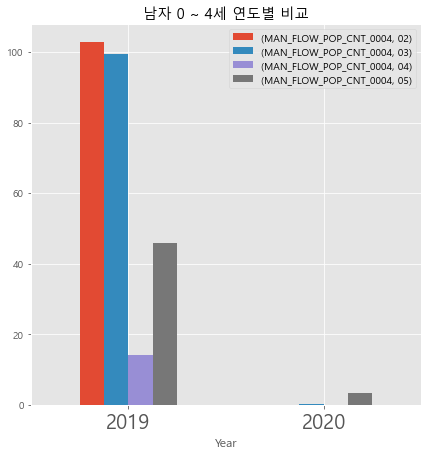

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_0509                           
Month                    02       03       04       05
Year                                                  
2019               27468.65 35422.62 32771.58 45059.42
2020               20399.64 16255.25 17061.59 22659.19


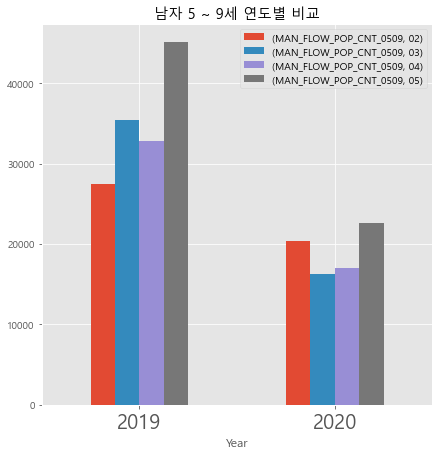

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_1014                              
Month                    02        03        04        05
Year                                                     
2019              110944.55 116583.51 134663.50 194645.54
2020              121675.64 101074.60 103698.66 128891.21


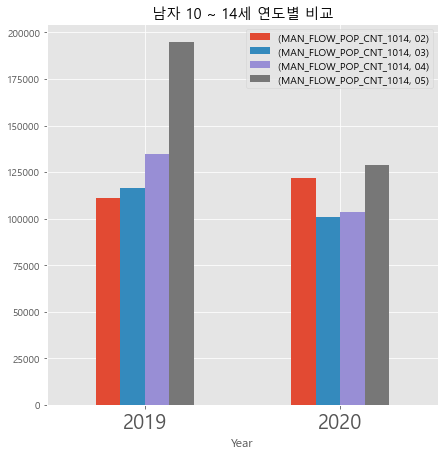

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_1519                              
Month                    02        03        04        05
Year                                                     
2019              223655.41 285897.78 280536.01 359631.71
2020              209378.00 183661.05 177762.02 213603.74


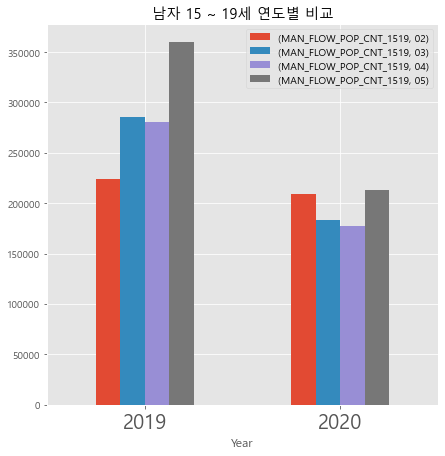

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_2024                              
Month                    02        03        04        05
Year                                                     
2019              332048.93 401185.87 352384.52 455225.36
2020              331391.11 287576.41 296655.81 357371.04


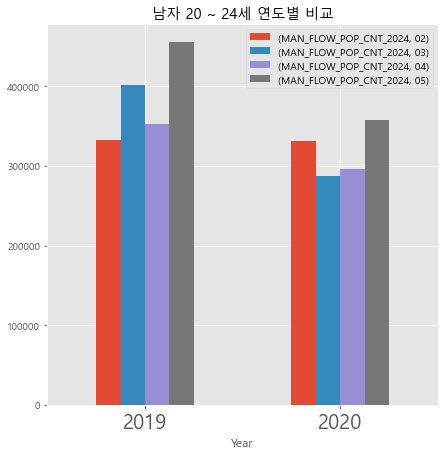

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_2529                              
Month                    02        03        04        05
Year                                                     
2019              454418.25 495266.27 453527.76 521918.68
2020              400532.97 373419.61 379274.09 458260.33


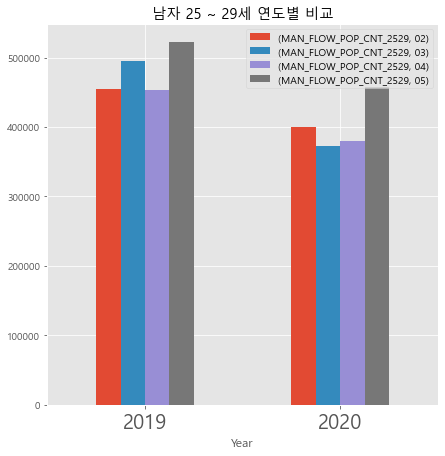

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_3034                              
Month                    02        03        04        05
Year                                                     
2019              496817.52 544621.89 488796.85 548469.43
2020              401167.81 387196.68 401634.39 477251.15


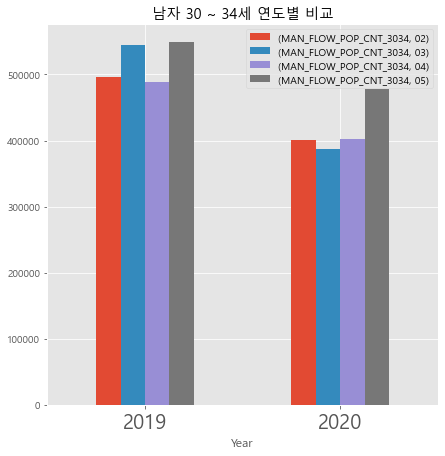

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_3539                              
Month                    02        03        04        05
Year                                                     
2019              638315.63 712257.47 640053.69 705663.81
2020              527889.98 513065.74 526372.52 607859.12


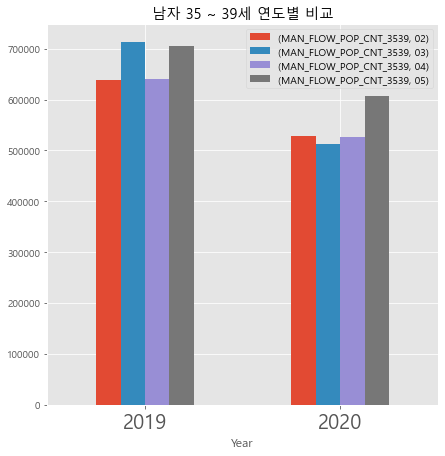

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_4044                              
Month                    02        03        04        05
Year                                                     
2019              695643.94 782201.34 694282.92 775860.13
2020              617981.69 600382.95 624912.00 718649.95


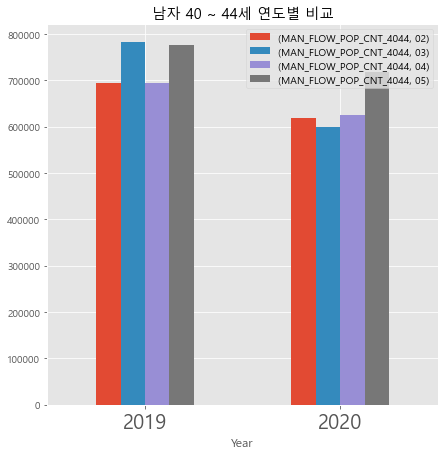

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_4549                              
Month                    02        03        04        05
Year                                                     
2019              855467.88 976588.73 860905.47 964233.52
2020              765640.67 760209.35 783584.38 883061.77


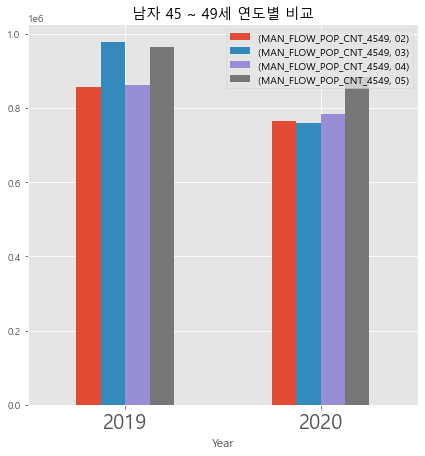

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_5054                              
Month                    02        03        04        05
Year                                                     
2019              831216.46 951910.04 820637.57 900604.16
2020              794224.47 780857.13 795726.21 889380.67


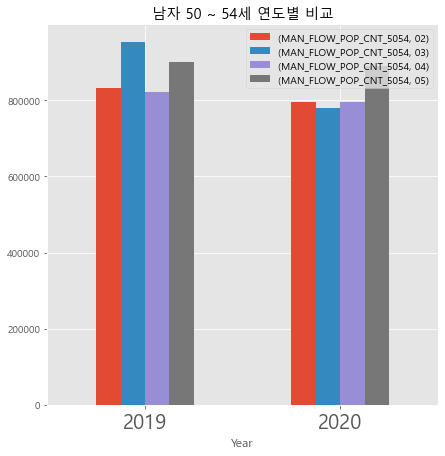

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_5559                              
Month                    02        03        04        05
Year                                                     
2019              728497.66 824507.63 704674.03 752775.30
2020              652699.76 646410.18 667218.10 741919.73


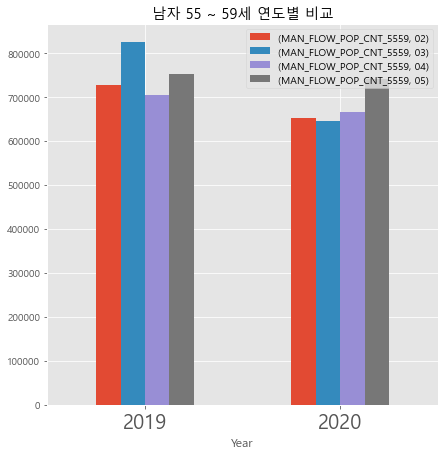

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_6064                              
Month                    02        03        04        05
Year                                                     
2019              582304.19 669411.79 564753.44 603189.58
2020              542532.46 535171.64 556816.59 613937.34


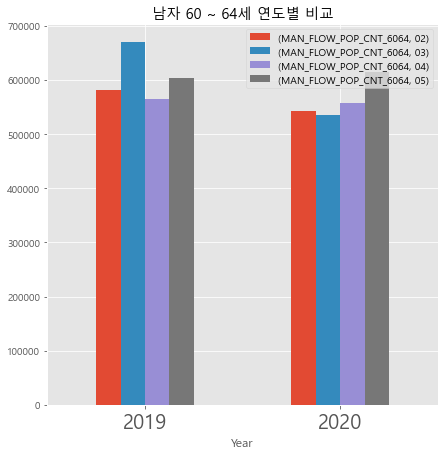

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_6569                              
Month                    02        03        04        05
Year                                                     
2019              329010.88 392084.48 330323.32 353271.93
2020              350379.67 334214.34 352934.72 389149.10


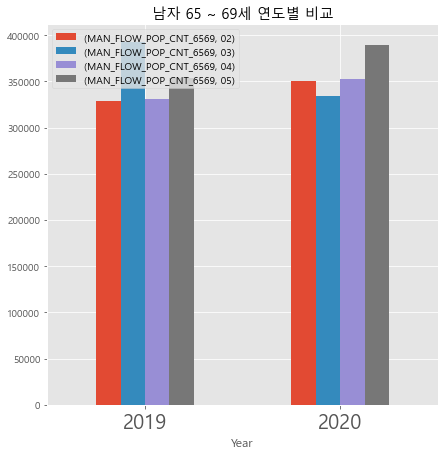

--------------------------------------------------------------------------------------------
      MAN_FLOW_POP_CNT_70U                              
Month                   02        03        04        05
Year                                                    
2019             314695.16 376601.78 328238.06 356137.24
2020             322714.87 306234.67 319615.11 365944.04


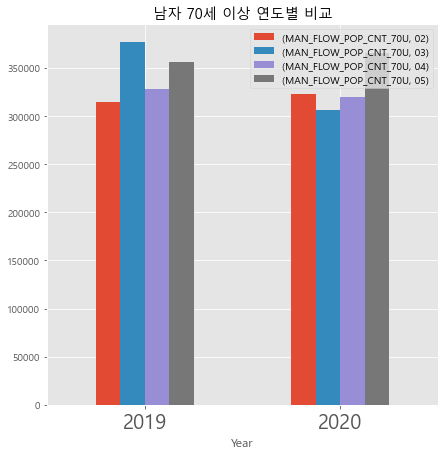

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_0004                 
Month                     02    03    04   05
Year                                         
2019                   13.87 17.80 27.33 3.83
2020                    0.00  0.00  0.00 3.60


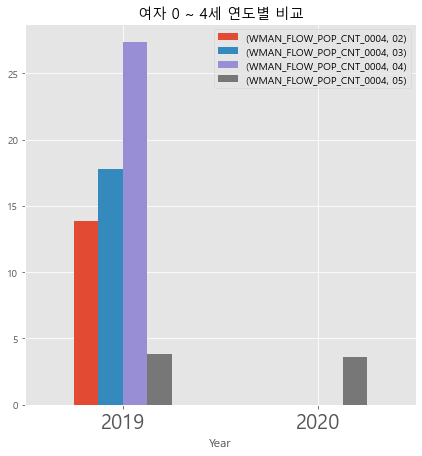

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_0509                           
Month                     02       03       04       05
Year                                                   
2019                33660.81 40253.22 38689.89 57008.59
2020                25566.94 20343.94 21908.13 30577.03


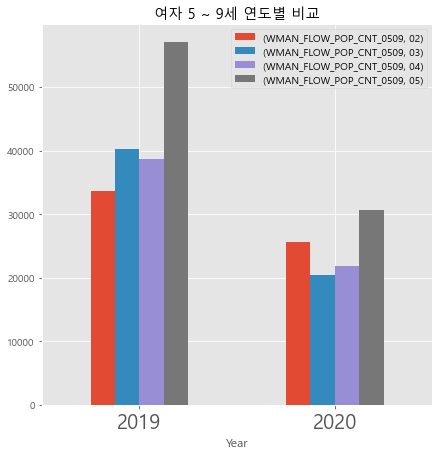

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_1014                              
Month                     02        03        04        05
Year                                                      
2019               104107.15 105074.35 121650.09 181697.96
2020               121198.77  96493.34  95008.22 118370.25


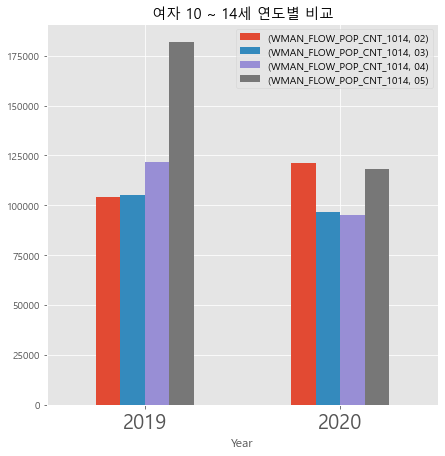

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_1519                              
Month                     02        03        04        05
Year                                                      
2019               196317.29 233951.27 229824.35 323551.51
2020               202057.82 171716.10 164872.97 200954.15


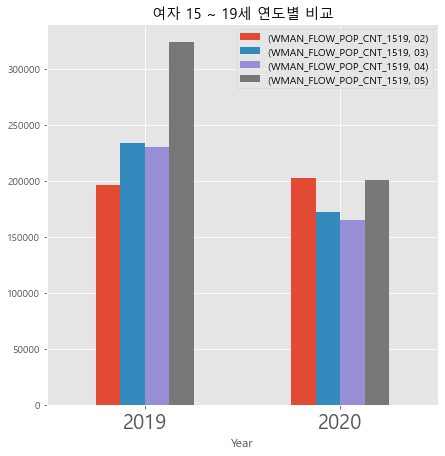

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_2024                              
Month                     02        03        04        05
Year                                                      
2019               325461.73 403492.91 361129.07 445380.39
2020               304377.92 272371.63 271359.79 321594.74


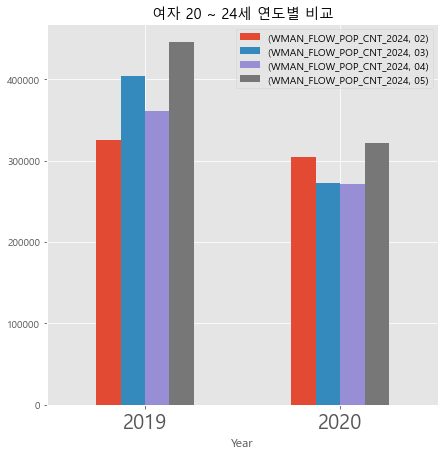

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_2529                              
Month                     02        03        04        05
Year                                                      
2019               334918.84 357409.74 335480.99 391390.06
2020               312211.74 295760.05 290153.81 341931.20


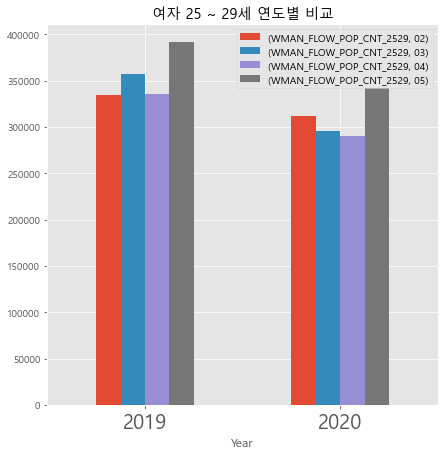

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_3034                              
Month                     02        03        04        05
Year                                                      
2019               339376.05 369617.24 335438.79 386125.54
2020               271842.75 248429.78 263153.05 329787.73


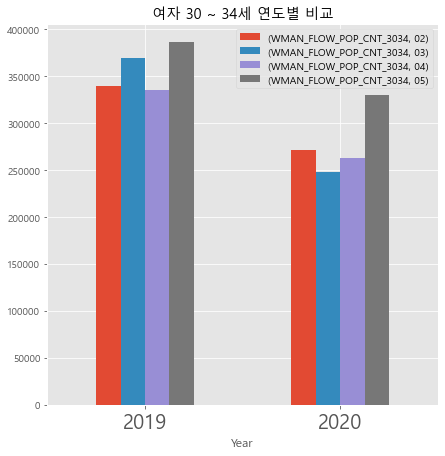

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_3539                              
Month                     02        03        04        05
Year                                                      
2019               482472.41 528763.06 481897.10 575474.00
2020               397062.99 359118.81 361047.25 436743.67


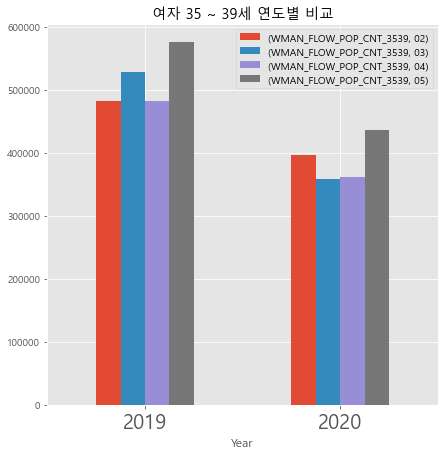

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_4044                              
Month                     02        03        04        05
Year                                                      
2019               526751.92 591584.73 550826.42 661969.39
2020               499539.31 462113.50 470821.56 551487.08


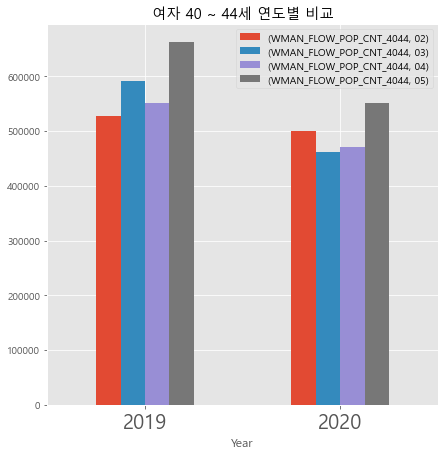

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_4549                              
Month                     02        03        04        05
Year                                                      
2019               655957.53 747251.56 693116.69 814634.20
2020               626103.32 581707.76 606805.27 704381.96


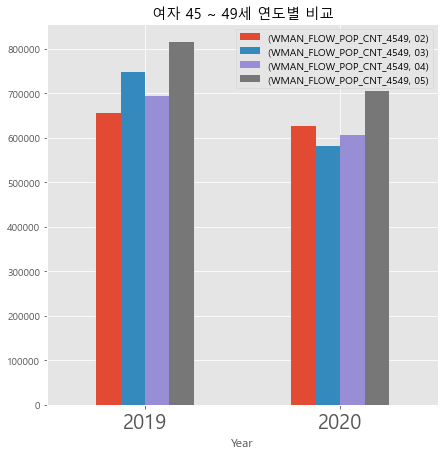

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_5054                              
Month                     02        03        04        05
Year                                                      
2019               585490.29 657932.84 588816.51 663238.64
2020               568006.18 543403.45 561400.09 641269.74


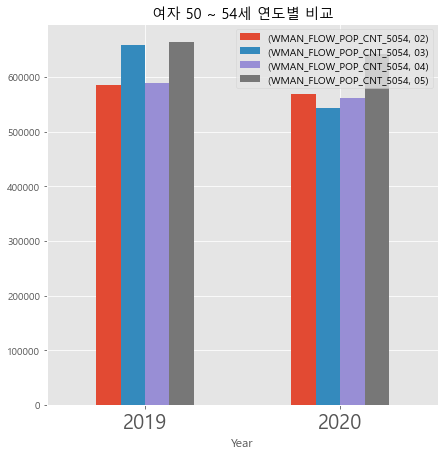

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_5559                              
Month                     02        03        04        05
Year                                                      
2019               510793.33 578964.36 508487.76 556584.15
2020               471983.94 449711.17 463930.20 531909.54


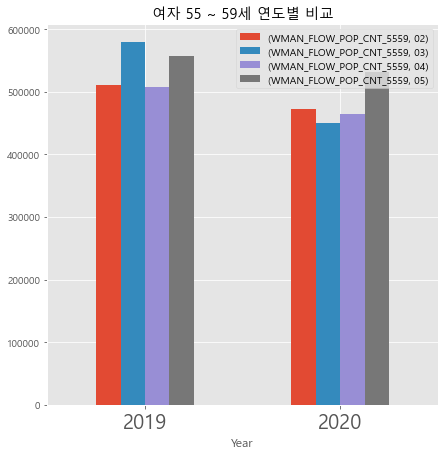

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_6064                              
Month                     02        03        04        05
Year                                                      
2019               374727.31 429921.28 374795.91 403296.23
2020               363517.92 342592.18 353011.82 406029.07


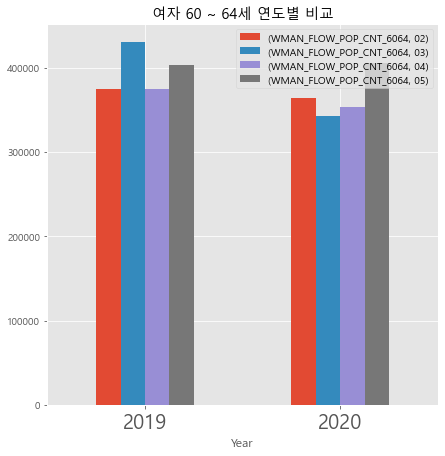

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_6569                              
Month                     02        03        04        05
Year                                                      
2019               211605.02 247749.56 217061.68 235522.02
2020               226654.46 210216.75 219831.67 258327.93


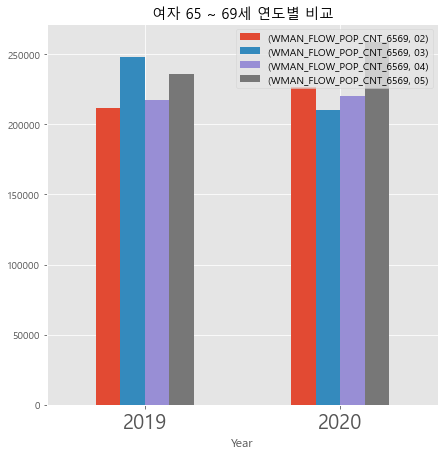

--------------------------------------------------------------------------------------------
      WMAN_FLOW_POP_CNT_70U                              
Month                    02        03        04        05
Year                                                     
2019              230528.52 270602.90 249011.73 273980.45
2020              248899.99 221354.82 233972.20 273074.97


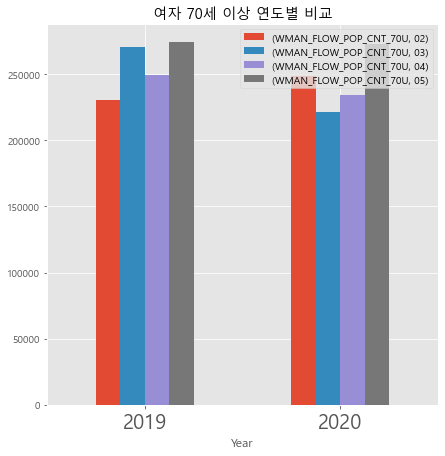

--------------------------------------------------------------------------------------------


In [759]:
# 고산동, 공릉, 광희동 그래프 추출.
# for i in location_list[0]:
#     print('')
#     print('')
#     print('=========================================================================')
#     print('================================  {}  ==================================='.format(i))
#     print('=========================================================================')
#     print('')
#     print('')
print('================================  {}  ==================================='.format('고산'))
Check_year(Age_sep,'고산')

##### 결론
- 고산동의 경우 월별로 유동인구를 합산, 이를 연도별로 유동인구를 비교해보았데 유아, 청소년기 제외하면 뚜렷한 차이는 보이지 않음

### 2) 월별 그래프 그리기
- 고산동, 2019년 2월 기준으로 

In [516]:
Test = dict(list(Age_sep['고산'].groupby(['Year'])))

In [518]:
Test['2019'][Test['2019']['Month']=='02']

,Year,Month,Day,HDONG_name,HDONG_region,HDONG_CD,MAN_FLOW_POP_CNT_0004,MAN_FLOW_POP_CNT_0509,MAN_FLOW_POP_CNT_1014,MAN_FLOW_POP_CNT_1519,...,WMAN_FLOW_POP_CNT_2529,WMAN_FLOW_POP_CNT_3034,WMAN_FLOW_POP_CNT_3539,WMAN_FLOW_POP_CNT_4044,WMAN_FLOW_POP_CNT_4549,WMAN_FLOW_POP_CNT_5054,WMAN_FLOW_POP_CNT_5559,WMAN_FLOW_POP_CNT_6064,WMAN_FLOW_POP_CNT_6569,WMAN_FLOW_POP_CNT_70U
1848,2019,02,01,고산,1동,2726067000,0.00,293.86,1337.99,3566.15,...,3686.51,3505.06,5378.35,6873.14,8738.32,7054.94,6223.24,4382.69,2367.20,2692.64
1849,2019,02,02,고산,1동,2726067000,0.00,380.44,1581.89,2664.08,...,4106.49,3829.11,5571.38,6382.14,8096.33,6796.03,5909.42,4090.35,2237.74,2438.63
1850,2019,02,03,고산,1동,2726067000,0.06,275.53,1397.83,2578.06,...,3722.76,3809.50,5098.91,5586.15,6897.68,5818.76,4604.21,3239.26,1735.85,1864.53
1851,2019,02,04,고산,1동,2726067000,1.72,220.42,1302.12,2521.31,...,3515.88,3574.16,4755.63,4913.63,5963.73,5293.29,4320.51,2844.76,1335.55,1530.11
1852,2019,02,05,고산,1동,2726067000,0.09,411.64,2102.73,3868.73,...,4546.04,4744.58,6449.51,6426.27,7451.72,6769.50,5245.35,3549.99,1812.04,1917.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,2019,02,24,고산,3동,2726069000,0.05,146.86,677.67,1084.16,...,1502.39,1492.40,1980.33,2176.22,2912.72,2346.66,2167.17,1581.96,892.01,990.72
1928,2019,02,25,고산,3동,2726069000,0.05,187.83,534.66,1024.18,...,1419.83,1502.75,2289.69,2481.96,3172.65,2942.42,2454.88,1797.78,1038.36,1206.05
1929,2019,02,26,고산,3동,2726069000,0.03,146.97,494.97,925.04,...,1472.12,1493.60,2205.07,2522.17,3444.12,2866.35,2494.56,1863.79,1044.34,1225.85
1930,2019,02,27,고산,3동,2726069000,0.08,164.30,555.82,1027.75,...,1436.20,1433.72,2195.25,2493.84,3286.59,2916.41,2450.63,1738.96,1014.68,1065.82


In [762]:
age_dict = {'0004' : "0 ~ 4세",'0509' : "5 ~ 9세",'1014':"10 ~ 14세",'1519': "15 ~ 19세",'2024':"20 ~ 24세",'2529' : "25 ~ 29세",'3034' : "30 ~ 34세",'3539':"35 ~ 39세",'4044': "40 ~ 44세",'4549' : "45 ~ 49세",'5054' : "50 ~ 54세",'5559' : "55 ~ 59세",'6064' : "60 ~ 64세",'6569' : "65 ~ 69세",'70U' : "70세 이상"}
list_age = ['0004','0509','1014','1519','2024','2529','3034','3539','4044','4549','5054','5559','6064','6569','70U']
sex_dict = {'MAN' : '남자', 'WMAN' : '여자'}

In [770]:
# sex : 'MAN' or "WMAN"
def Check_month(data,sex,age,year = 2019,Month="02"):
    sns.factorplot(x = 'Day',y='{}_FLOW_POP_CNT_{}'.format(sex,age),data = data[str(year)][data[str(year)]['Month'] == Month],hue = 'HDONG_region',size = 6)
    plt.title('2019년 2월 고산동 {} {} 그래프'.format(sex_dict[sex],age_dict[age]))
    plt.show()

2019년 2월 고산동 연령별 남성 유동인구 그래프

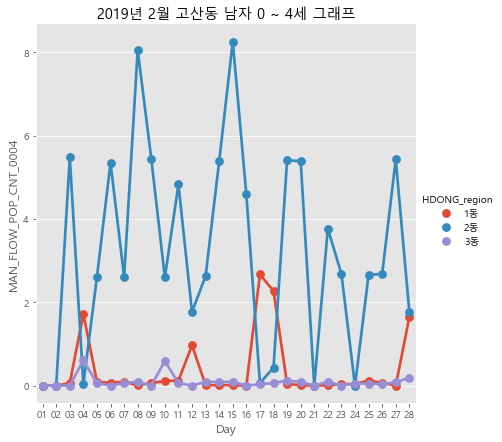

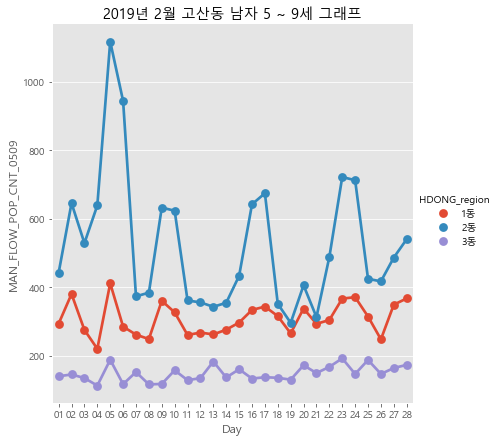

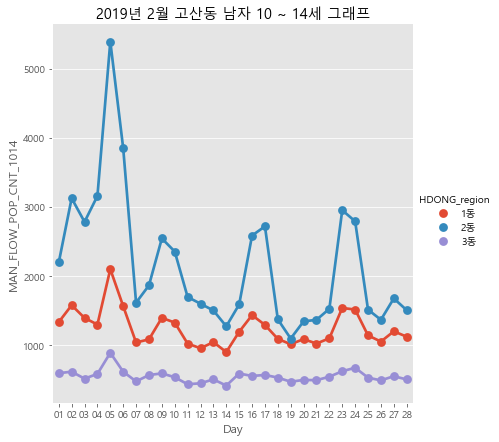

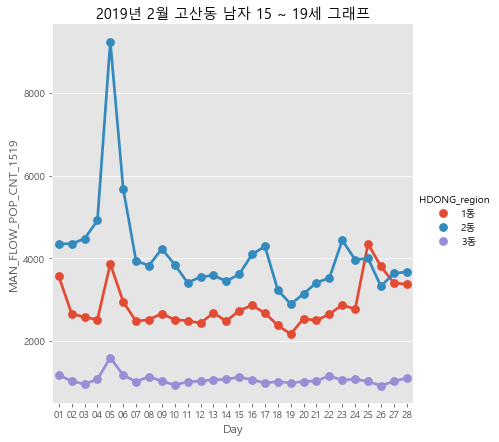

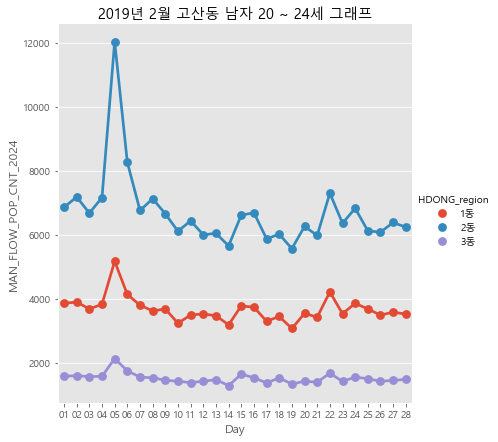

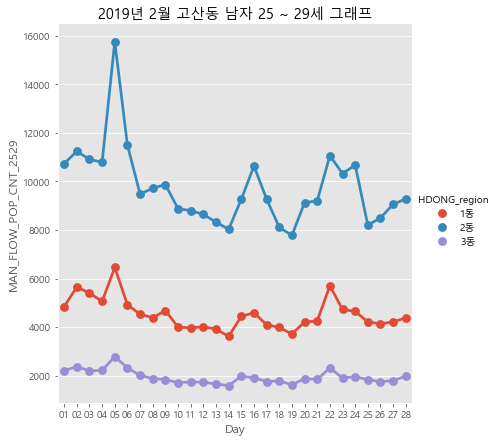

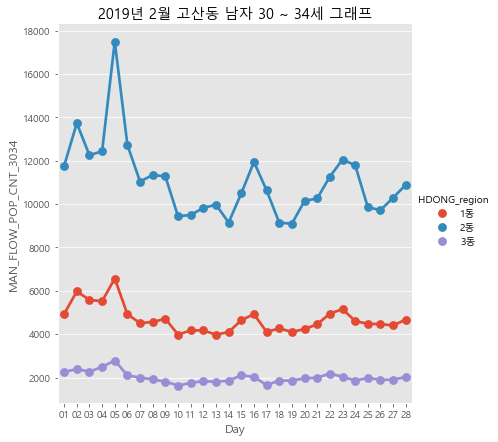

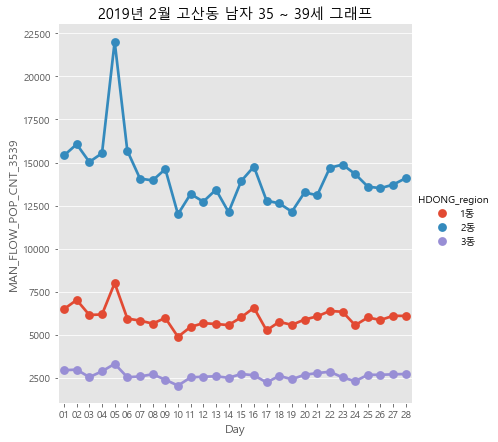

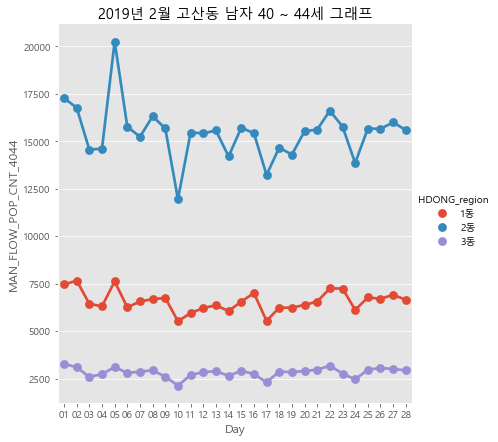

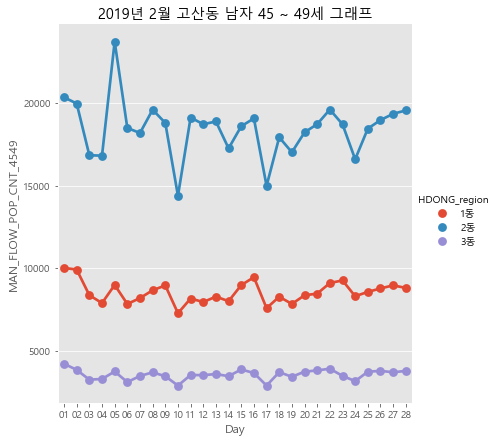

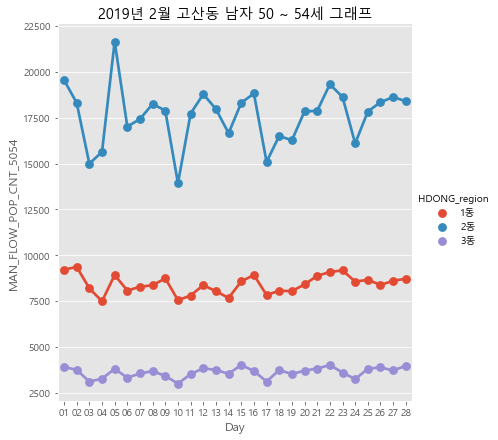

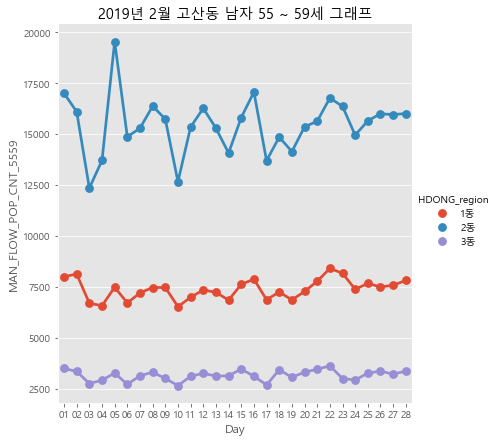

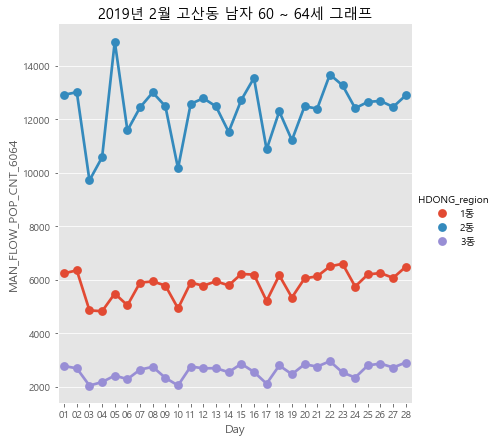

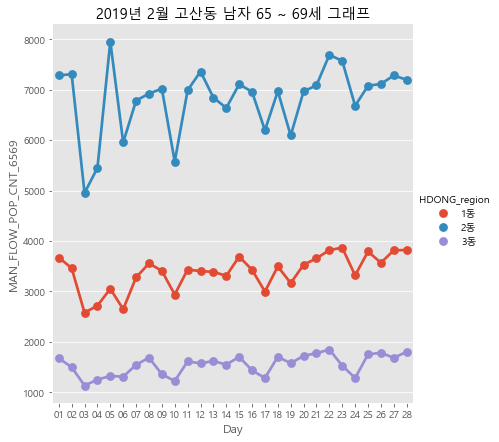

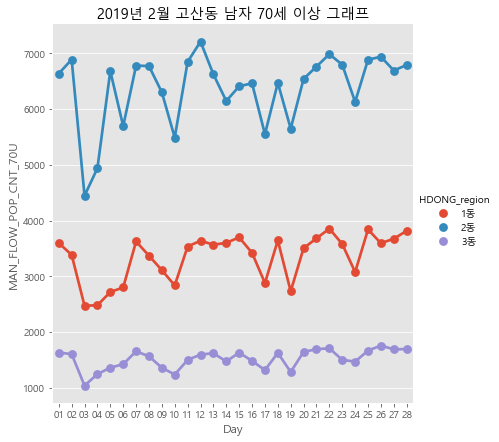

In [777]:
for age in list_age:
    Check_month(Test,'MAN',age)

2019년 2월 여성 연령별 고산동 그래프

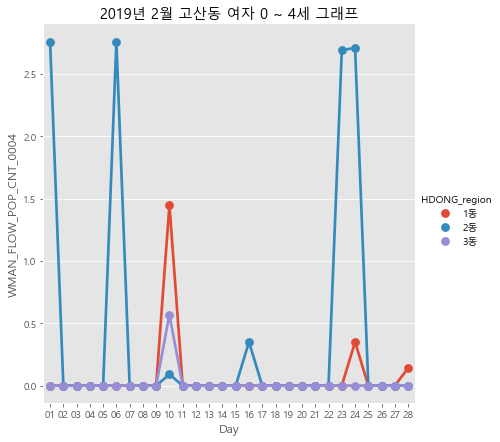

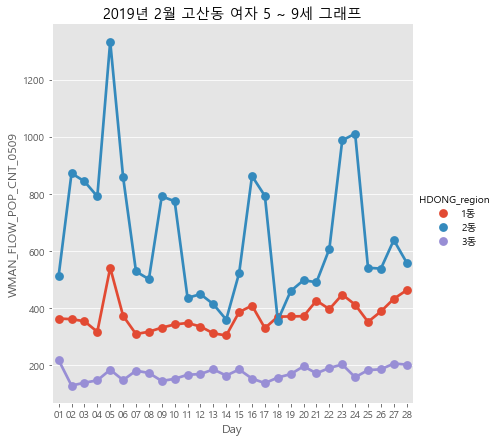

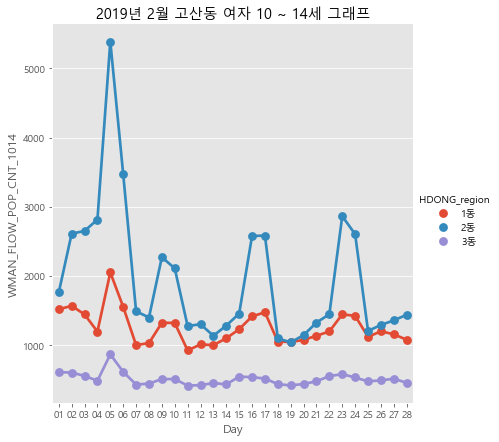

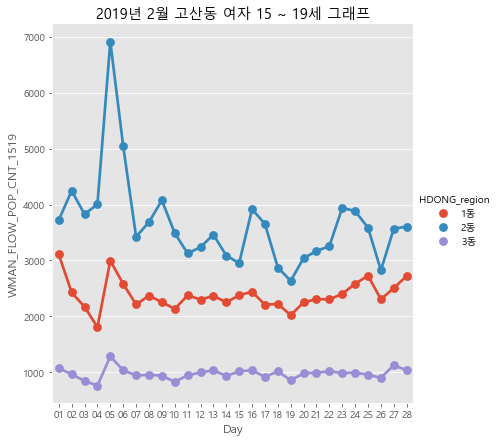

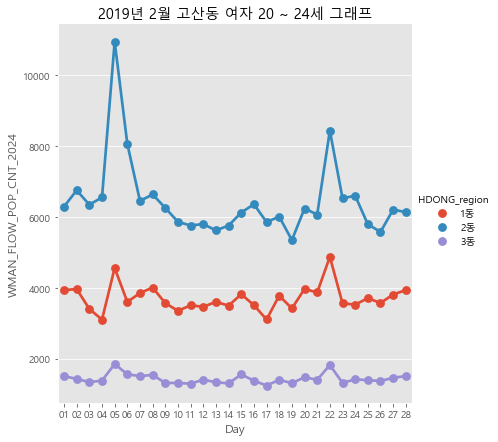

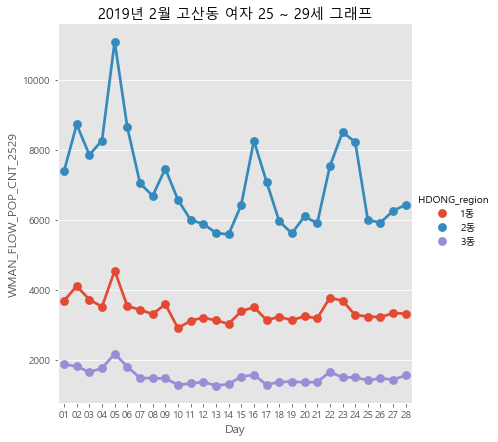

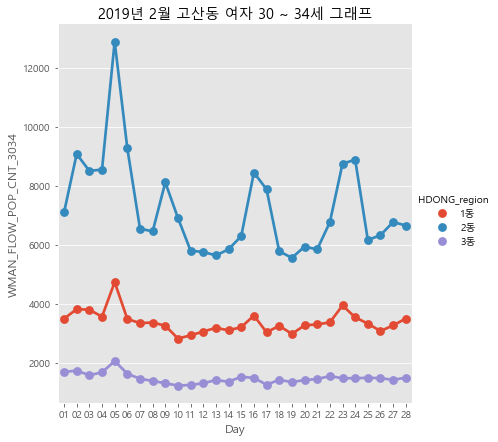

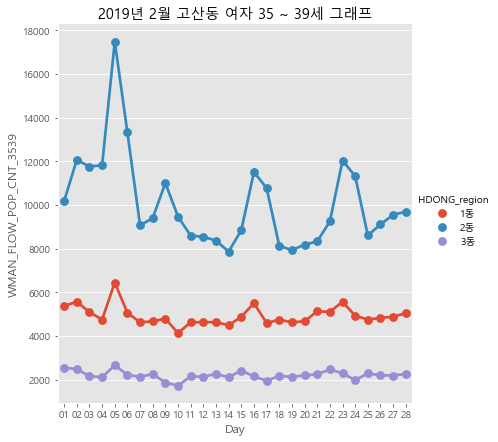

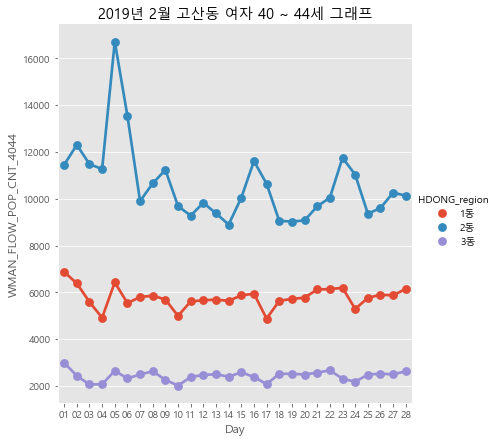

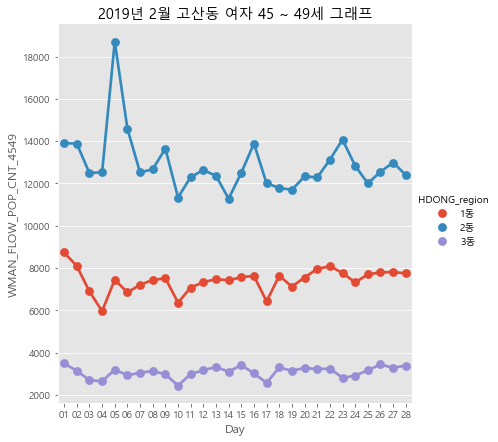

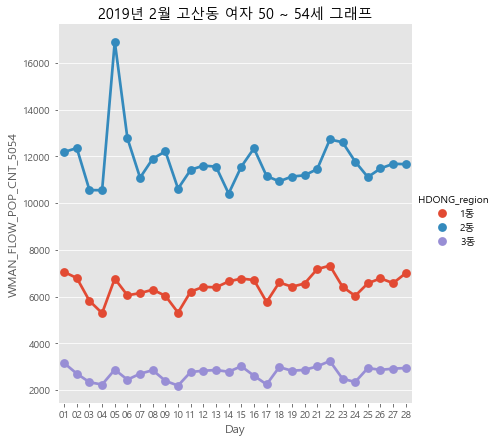

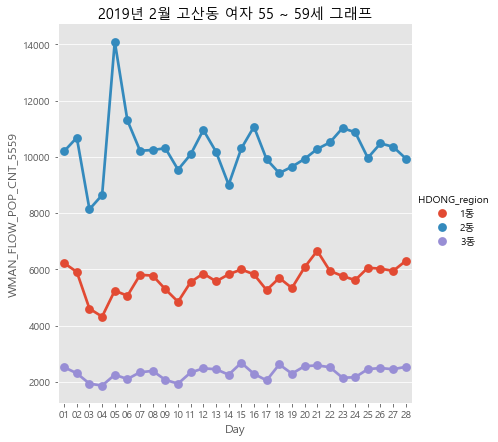

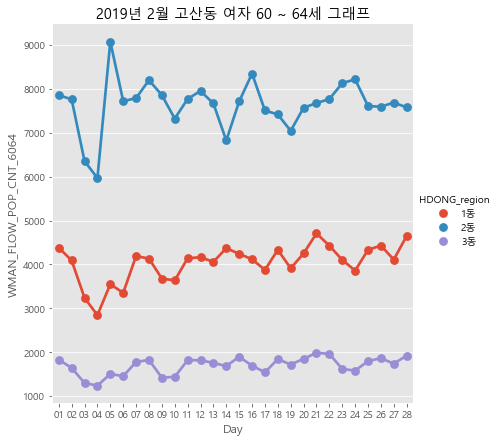

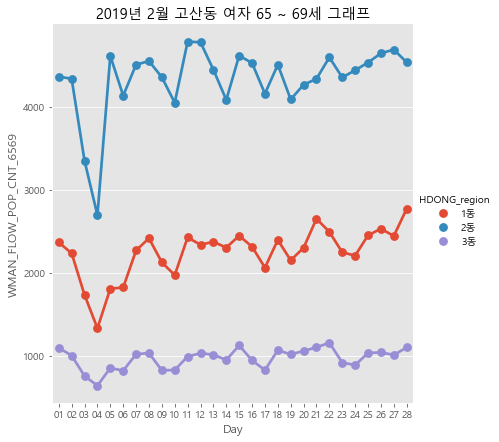

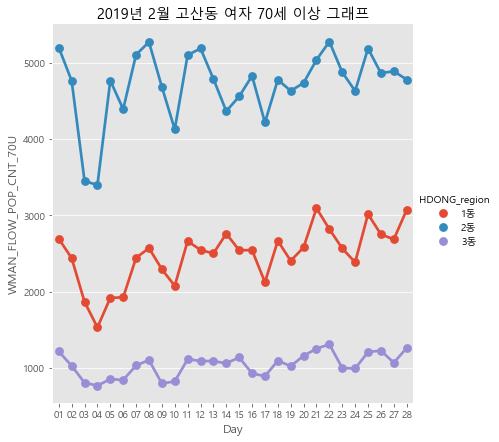

In [778]:
for age in list_age:
    Check_month(Test,'WMAN',age)

##### 결론
- 고산동의 경우 1동의 유동인구가 다른 2,3동보다 눈에 띄게 많은 것을 볼 수 있다.